<a href="https://colab.research.google.com/github/avibharadwaj/DataNetworks/blob/master/bonus_255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#import all tensorflow libraries and important packages
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [71]:
#Getting the dataset
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
test_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
feature_names = column_names[:-1]
label_name = column_names[-1]

training_set = pd.read_csv(train_dataset_url)
test_set = pd.read_csv(test_dataset_url)

In [77]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   120         120 non-null    float64
 1   4           120 non-null    float64
 2   setosa      120 non-null    float64
 3   versicolor  120 non-null    float64
 4   virginica   120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [76]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   30          30 non-null     float64
 1   4           30 non-null     float64
 2   setosa      30 non-null     float64
 3   versicolor  30 non-null     float64
 4   virginica   30 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [79]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
training_set.columns = column_names
test_set.columns = column_names

In [80]:
final_set = training_set.append(test_set)
final_set

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
25,6.1,3.0,4.6,1.4,1
26,5.2,4.1,1.5,0.1,0
27,6.7,3.1,4.7,1.5,1
28,6.7,3.3,5.7,2.5,2


In [104]:
X = final_set.loc[:, final_set.columns != 'species']
y = final_set.loc[:, ['species']]

In [105]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3
...,...,...,...,...
25,6.1,3.0,4.6,1.4
26,5.2,4.1,1.5,0.1
27,6.7,3.1,4.7,1.5
28,6.7,3.3,5.7,2.5


In [106]:
y

,species
0,2
1,1
2,2
3,0
4,0
...,...
25,1
26,0
27,1
28,2


In [107]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [109]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)


In [110]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              5000      
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dense_10 (Dense)            (None, 300)               150300    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [112]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [113]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 1s 135ms/step - loss: 0.9878 - accuracy: 0.5524 - val_loss: 0.8219 - val_accuracy: 0.5556
Epoch 2/30
4/4 [==============================] - 0s 24ms/step - loss: 0.7076 - accuracy: 0.6571 - val_loss: 0.6575 - val_accuracy: 0.6000
Epoch 3/30
4/4 [==============================] - 0s 29ms/step - loss: 0.5052 - accuracy: 0.7048 - val_loss: 0.4472 - val_accuracy: 0.9556
Epoch 4/30
4/4 [==============================] - 0s 31ms/step - loss: 0.4073 - accuracy: 0.8286 - val_loss: 0.3956 - val_accuracy: 0.8444
Epoch 5/30
4/4 [==============================] - 0s 24ms/step - loss: 0.3506 - accuracy: 0.8000 - val_loss: 0.3129 - val_accuracy: 0.9556
Epoch 6/30
4/4 [==============================] - 0s 22ms/step - loss: 0.2911 - accuracy: 0.9143 - val_loss: 0.2717 - val_accuracy: 0.9333
Epoch 7/30
4/4 [==============================] - 0s 24ms/step - loss: 0.2544 - accuracy: 0.9143 - val_loss: 0.2144 - val_accuracy: 0.9333
Epoch 8/30
4/4 [==========

In [114]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0969 - accuracy: 0.9556


[0.09693936258554459, 0.9555555582046509]

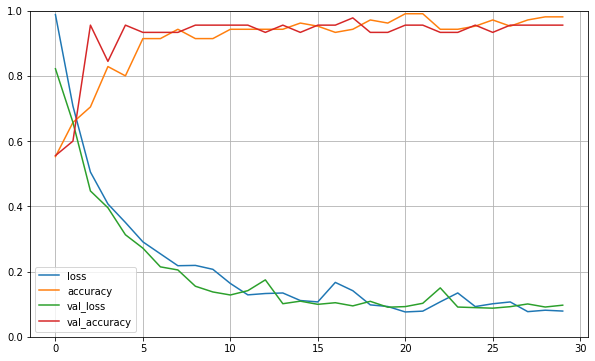

In [115]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()